# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

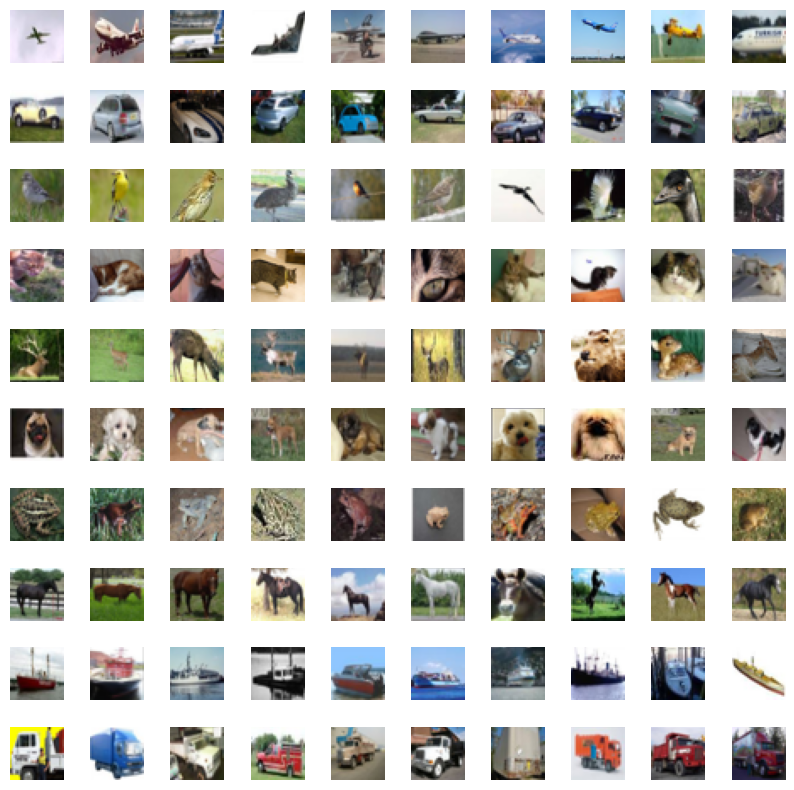

Data Preprocessing Completed!
x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 10)


In [18]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize 10 random images per class
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(10):  # Loop through each class
    class_indices = np.where(y_train.flatten() == i)[0]
    selected_indices = np.random.choice(class_indices, 10, replace=False)

    for j, idx in enumerate(selected_indices):
        ax = axes[i, j]
        ax.imshow(x_train[idx])
        ax.axis('off')

plt.show()

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalize images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Data Preprocessing Completed!")
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
from keras.backend import clear_session
clear_session()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.backend import clear_session

# # Clear previous session
# clear_session()

# Load CIFAR-10 dataset
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# # Normalize images
# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0

# # Convert labels to one-hot encoding
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), input_shape=(32, 32, 3)),  # Convolutional Layer
    MaxPooling2D(pool_size=(2,2)),  # Max Pooling Layer
    Flatten(),  # Flatten the feature maps
    Dense(100, activation='relu'),  # Fully Connected Layer with 100 neurons
    Dense(10, activation='softmax')  # Output Layer for classification (10 classes)
])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
# model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.2238 - loss: 2.1294 - val_accuracy: 0.3605 - val_loss: 1.8182
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3744 - loss: 1.7744 - val_accuracy: 0.4254 - val_loss: 1.6219
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4463 - loss: 1.5676 - val_accuracy: 0.4929 - val_loss: 1.4341
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5007 - loss: 1.4151 - val_accuracy: 0.4961 - val_loss: 1.4052
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5297 - loss: 1.3431 - val_accuracy: 0.5402 - val_loss: 1.3003
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5558 - loss: 1.2709 - val_accuracy: 0.5481 - val_loss: 1.2713
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5732 - loss: 1.2219 - val_accuracy: 0.5634 - val_loss: 1.2374
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5905 - loss: 1.1792 - val_accuracy: 0.5643 - v

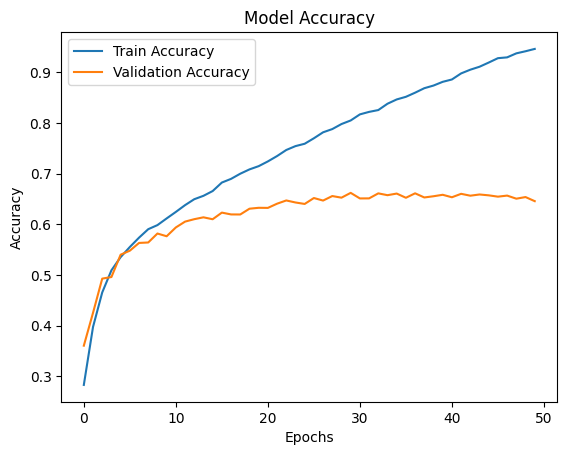

313/313 - 2s - 5ms/step - accuracy: 0.6459 - loss: 1.3483

Test Accuracy: 0.6459


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session

# # Clear previous session
# clear_session()

# # Load CIFAR-10 dataset
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# # Normalize images
# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0

# # Convert labels to one-hot encoding
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# # Define the CNN model
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional Layer
#     MaxPooling2D(pool_size=(2,2)),  # Max Pooling Layer
#     Flatten(),  # Flatten the feature maps
#     Dense(100, activation='relu'),  # Fully Connected Layer with 100 neurons
#     Dense(10, activation='softmax')  # Output Layer for classification (10 classes)
# ])

# Compile the model with SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 50 epochs with batch size of 512
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test))

# # Plot training & validation accuracy
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Model Accuracy')
# plt.show()

# Evaluate on test data
# test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
# print(f"\nTest Accuracy: {test_acc:.4f}")


*   Plot the cross entropy loss curve and the accuracy curve

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.2065 - loss: 2.1561 - val_accuracy: 0.3680 - val_loss: 1.7931
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3839 - loss: 1.7494 - val_accuracy: 0.4322 - val_loss: 1.6099
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4436 - loss: 1.5675 - val_accuracy: 0.4679 - val_loss: 1.4770
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4933 - loss: 1.4313 - val_accuracy: 0.4985 - val_loss: 1.4040
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5287 - loss: 1.3464 - val_accuracy: 0.5399 - val_loss: 1.3010
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5492 - loss: 1.2738 - val_accuracy: 0.5586 - val_loss: 1.2619
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5730 - loss: 1.2168 - val_accuracy: 0.5542 - val_loss: 1.2561
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5856 - loss: 1.1837 - val_accuracy: 0.5705 - v

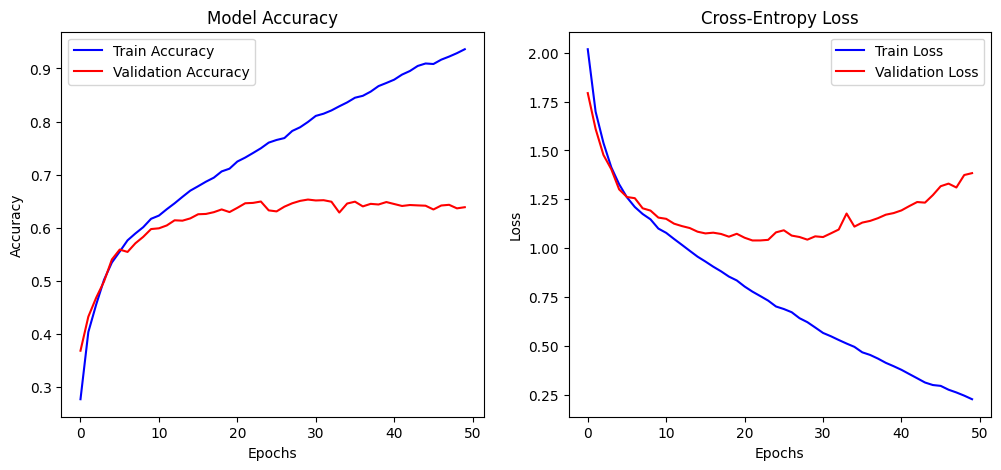

313/313 - 1s - 3ms/step - accuracy: 0.6385 - loss: 1.3841

Test Accuracy: 0.6385


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session

# # Clear previous session
# clear_session()

# # Load CIFAR-10 dataset
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# # Normalize images
# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0

# # Convert labels to one-hot encoding
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# # Define the CNN model
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional Layer
#     MaxPooling2D(pool_size=(2,2)),  # Max Pooling Layer
#     Flatten(),  # Flatten the feature maps
#     Dense(100, activation='relu'),  # Fully Connected Layer with 100 neurons
#     Dense(10, activation='softmax')  # Output Layer for classification (10 classes)
# ])

# # Compile the model with SGD optimizer
# model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model for 50 epochs with batch size of 512
# history = model.fit(x_train, y_train,
#                     epochs=50,
#                     batch_size=512,
#                     validation_data=(x_test, y_test))

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Cross-Entropy Loss')

plt.show()

# # Evaluate on test data
# test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
# print(f"\nTest Accuracy: {test_acc:.4f}")


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.1876 - loss: 2.1850 - val_accuracy: 0.3794 - val_loss: 1.7891
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3868 - loss: 1.7427 - val_accuracy: 0.4513 - val_loss: 1.5576
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4640 - loss: 1.5180 - val_accuracy: 0.5115 - val_loss: 1.3702
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5205 - loss: 1.3461 - val_accuracy: 0.5473 - val_loss: 1.2746
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5570 - loss: 1.2514 - val_accuracy: 0.5757 - val_loss: 1.2001
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5887 - loss: 1.1669 - val_accuracy: 0.5839 - val_loss: 1.1801
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6088 - loss: 1.1092 - val_accuracy: 0.6038 - val_loss: 1.1245
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6407 - loss: 1.0192 - val_accuracy: 0.6140 - v

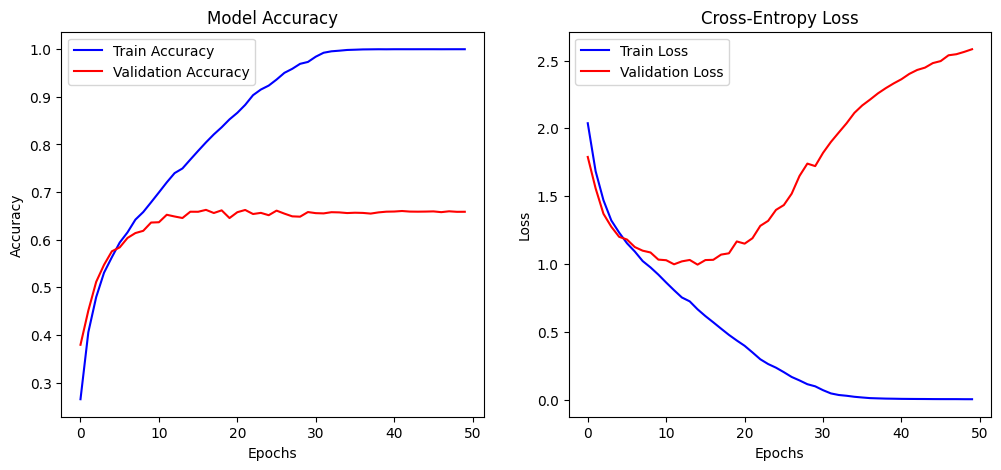

313/313 - 1s - 5ms/step - accuracy: 0.6587 - loss: 2.5837

Test Accuracy: 0.6587


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session

# # Clear previous session
# clear_session()

# # Load CIFAR-10 dataset
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# # Normalize images
# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0

# # Convert labels to one-hot encoding
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# Define the VGG-like CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),  # 1st Conv Layer
    Conv2D(32, (3,3), activation='relu', padding='same'),  # 2nd Conv Layer
    MaxPooling2D(pool_size=(2,2)),  # Max Pooling Layer
    Flatten(),  # Flatten the feature maps
    Dense(128, activation='relu'),  # Fully Connected Layer with 128 neurons
    Dense(10, activation='softmax')  # Output Layer for classification (10 classes)
])

# # Compile the model with SGD optimizer
# model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model for 50 epochs with batch size of 512
# history = model.fit(x_train, y_train,
#                     epochs=50,
#                     batch_size=512,
#                     validation_data=(x_test, y_test))

# # Plot Training & Validation Accuracy
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Model Accuracy')

# # Plot Training & Validation Loss
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss', color='blue')
# plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Cross-Entropy Loss')

# plt.show()

# # Evaluate on test data
# test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
# print(f"\nTest Accuracy: {test_acc:.4f}")


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2027 - loss: 2.1791 - val_accuracy: 0.3819 - val_loss: 1.7663
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3969 - loss: 1.7218 - val_accuracy: 0.4609 - val_loss: 1.5110
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4688 - loss: 1.4878 - val_accuracy: 0.5028 - val_loss: 1.3991
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5227 - loss: 1.3496 - val_accuracy: 0.5560 - val_loss: 1.2673
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5657 - loss: 1.2271 - val_accuracy: 0.5761 - val_loss: 1.2039
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5961 - loss: 1.1501 - val_accuracy: 0.6036 - val_loss: 1.1389
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6295 - loss: 1.0646 - val_accuracy: 0.6046 - val_loss: 1.1170
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6490 - loss: 1.0082 - val_accuracy: 0.6117 - v

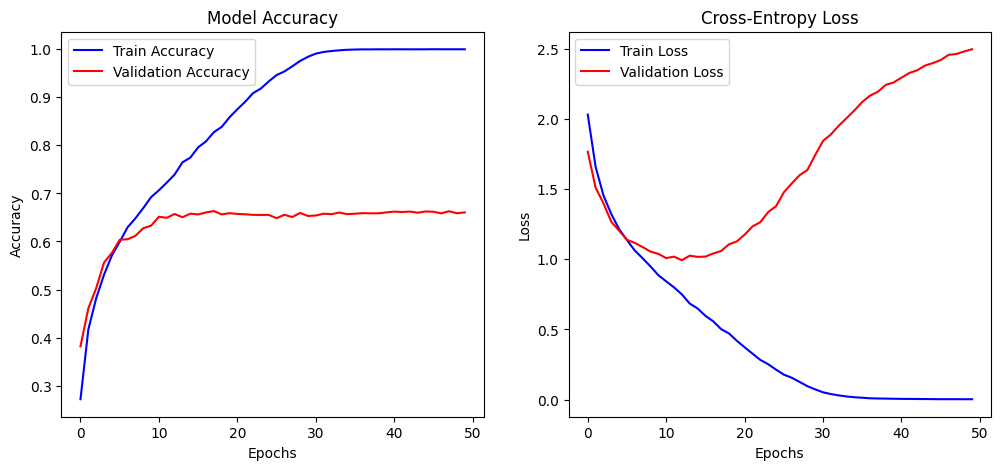

313/313 - 1s - 4ms/step - accuracy: 0.6605 - loss: 2.4973

Test Accuracy: 0.6605


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session

# # Clear previous session
# clear_session()

# # Load CIFAR-10 dataset
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# # Normalize images
# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0

# # Convert labels to one-hot encoding
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# # Define the VGG-like CNN model
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),  # 1st Conv Layer
#     Conv2D(32, (3,3), activation='relu', padding='same'),  # 2nd Conv Layer
#     MaxPooling2D(pool_size=(2,2)),  # Max Pooling Layer
#     Flatten(),  # Flatten the feature maps
#     Dense(128, activation='relu'),  # Fully Connected Layer with 128 neurons
#     Dense(10, activation='softmax')  # Output Layer for classification (10 classes)
# ])

# # Compile the model using SGD optimizer
# model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model for 50 epochs with batch size of 512
# history = model.fit(x_train, y_train,
#                     epochs=50,
#                     batch_size=512,
#                     validation_data=(x_test, y_test))

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Cross-Entropy Loss')

plt.show()




*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session

# Function to create a shallow model
def create_shallow_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Function to create a deeper VGG-style model
def create_deep_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Training hyperparameters
epochs = 50
batch_size = 512
optimizer = SGD(learning_rate=0.01, momentum=0.9)

#clear_session()
#deep_model = create_deep_model()
#deep_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#deep_history = deep_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

# Plot Accuracy Curves for Both Models


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session

# Function to create a shallow model
def create_shallow_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Function to create a deeper VGG-style model
def create_deep_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model



**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [24]:

# Print the test accuracy
print(f"\nTest Accuracy: {test_acc:.4f}")



Test Accuracy: 0.6605


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [14]:
from keras.backend import clear_session
clear_session()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session
import tensorflow as tf

# Define VGG-style model
def create_vgg_model():
    model = Sequential([
        # Block 1: Two Conv layers with 64 filters + Max Pooling
        Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        # Block 2: Two Conv layers with 128 filters + Max Pooling
        Conv2D(128, (3,3), activation='relu', padding='same'),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        # Block 3: Two Conv layers with 256 filters + Max Pooling
        Conv2D(256, (3,3), activation='relu', padding='same'),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        # Fully Connected Layers
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resize images to 64x64 using TensorFlow
x_train = tf.image.resize(x_train, (64, 64)) / 255.0
x_test = tf.image.resize(x_test, (64, 64)) / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Clear session and create model
clear_session()
vgg_model = create_vgg_model()

# Compile model
optimizer = SGD(learning_rate=0.01, momentum=0.9)
vgg_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
epochs = 50
batch_size = 512
history = vgg_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

# Print model summary
vgg_model.summary()


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 107s 797ms/step - accuracy: 0.1349 - loss: 2.2728 - val_accuracy: 0.1199 - val_loss: 2.3005
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 362ms/step - accuracy: 0.1513 - loss: 2.2779 - val_accuracy: 0.2593 - val_loss: 2.0973
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 356ms/step - accuracy: 0.2543 - loss: 2.0916 - val_accuracy: 0.3531 - val_loss: 1.8309
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 357ms/step - accuracy: 0.3885 - loss: 1.7330 - val_accuracy: 0.4814 - val_loss: 1.4539
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 364ms/step - accuracy: 0.4807 - loss: 1.4507 - val_accuracy: 0.5294 - val_loss: 1.3219
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 362ms/step - accuracy: 0.5395 - loss: 1.3085 - val_accuracy: 0.5633 - val_loss: 1.2391
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 363ms/step - accuracy: 0.5882 - loss: 1.1776 - val_accuracy: 0.5844 - val_loss: 1.1782
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 358ms/step - accuracy: 0.6286 - loss: 1.0680 - val_acc

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,487,958 (24.75 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,243,980 (12.37 MB)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 413ms/step - accuracy: 0.1274 - loss: 2.2691 - val_accuracy: 0.3000 - val_loss: 1.9357
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 365ms/step - accuracy: 0.3279 - loss: 1.8753 - val_accuracy: 0.4284 - val_loss: 1.5938
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - accuracy: 0.4441 - loss: 1.5540 - val_accuracy: 0.4935 - val_loss: 1.4036
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.5171 - loss: 1.3595 - val_accuracy: 0.5489 - val_loss: 1.2594
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 365ms/step - accuracy: 0.5716 - loss: 1.2155 - val_accuracy: 0.5793 - val_loss: 1.2071
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.6122 - loss: 1.1053 - val_accuracy: 0.6046 - val_loss: 1.1335
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.6500 - loss: 0.9984 - val_accuracy: 0.6412 - val_loss: 1.0303
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 366ms/step - accuracy: 0.6974 - loss: 0.8616 - val_accu

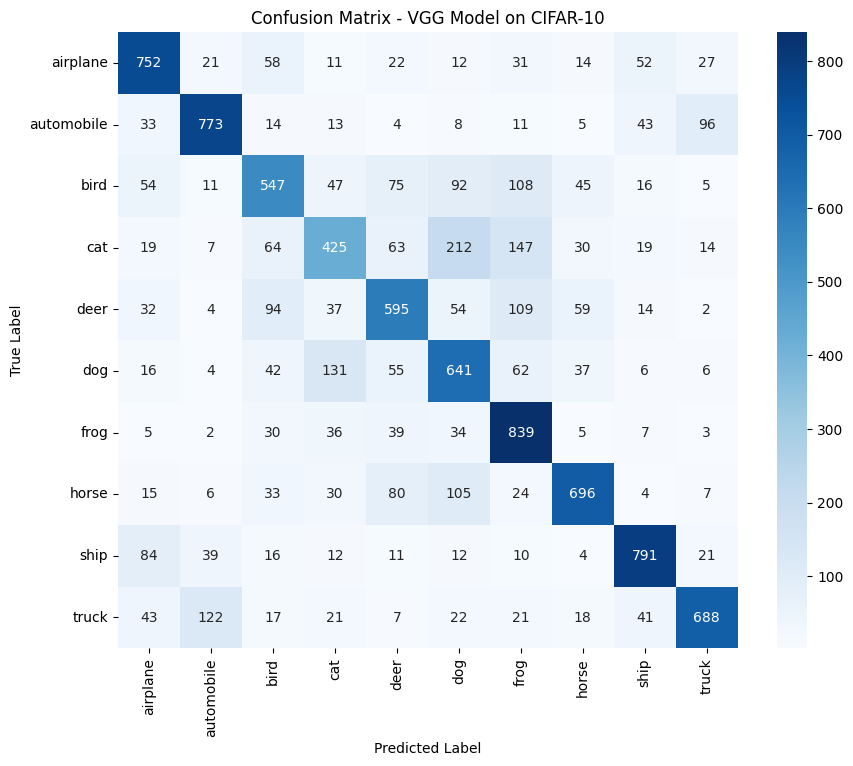

Classification Report:
               precision    recall  f1-score   support

    airplane       0.71      0.75      0.73      1000
  automobile       0.78      0.77      0.78      1000
        bird       0.60      0.55      0.57      1000
         cat       0.56      0.42      0.48      1000
        deer       0.63      0.59      0.61      1000
         dog       0.54      0.64      0.58      1000
        frog       0.62      0.84      0.71      1000
       horse       0.76      0.70      0.73      1000
        ship       0.80      0.79      0.79      1000
       truck       0.79      0.69      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Define VGG-style model
def create_vgg_model():
    model = Sequential([
        # Block 1
        Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        # Block 2
        Conv2D(128, (3,3), activation='relu', padding='same'),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        # Block 3
        Conv2D(256, (3,3), activation='relu', padding='same'),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        # Fully Connected Layers
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Load CIFAR-10 dataset
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resize images to 64x64 using TensorFlow
x_train = tf.image.resize(x_train, (64, 64)) / 255.0
x_test = tf.image.resize(x_test, (64, 64)) / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Clear session and create model
#clear_session()
#vgg_model = create_vgg_model()

# Compile model
#optimizer = SGD(learning_rate=0.01, momentum=0.9)
#vgg_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train model for 10 epochs
epochs = 10
batch_size = 512
history = vgg_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

# Predict on the test set
y_pred_probs = vgg_model.predict(x_test)  # Get softmax probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - VGG Model on CIFAR-10')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

allowing them to learn complex patterns.

_

2 - Key Differences between sigmoid and softmax:

Softmax is good for choosing one out of multiple classes

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary Crossentropy is used for "Yes/No" problems

_
